In [2]:
# Task 1:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets,linear_model
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df_marketing=pd.DataFrame(pd.read_csv('SalesBasedOnAdvertising.csv'))

In [4]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales
0,1,219.0,NaN,34.5,48.9
1,2,230.1,37.8,69.2,22.1
2,3,44.5,39.3,45.1,10.4
3,4,17.2,45.9,69.3,9.3
4,5,151.5,41.3,58.5,18.5


In [5]:
type(df_marketing)

pandas.core.frame.DataFrame

In [6]:
df_marketing.shape

(204, 5)

# represents (rows,columns)

In [7]:
df_marketing.describe()

,Sno,TV,radio,newspaper,sales
count,204.000000,204.000000,203.000000,204.000000,204.000000
mean,102.500000,146.602451,23.122167,30.712255,14.020588
std,59.033889,86.062496,14.810692,21.731852,5.905251
min,1.000000,0.000000,0.000000,0.300000,0.000000
25%,51.750000,72.700000,9.950000,12.875000,10.250000
50%,102.500000,149.750000,22.300000,26.050000,12.900000
75%,153.250000,218.625000,36.400000,45.100000,17.400000
max,204.000000,296.400000,49.600000,114.000000,48.900000


# count represents the total observations
# max,min represents the maximum and minimum amount spent on the respective attribute (Tv,radio,newspaper,sales)

In [8]:
k=df_marketing['radio'].isnull()
df_marketing['radio'][0]=df_marketing['radio'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df_marketing=df_marketing[(df_marketing.TV>0) & (df_marketing.radio>0) & (df_marketing.newspaper>0) & (df_marketing.sales>0)]

In [10]:
df_marketing.shape

(201, 5)

# new shape of the dataset

In [11]:
df_marketing.describe()

,Sno,TV,radio,newspaper,sales
count,201.000000,201.000000,201.000000,201.000000,201.000000
mean,102.278607,148.046269,23.362797,30.622388,14.186070
std,59.421141,85.769753,14.719480,21.688648,5.767626
min,1.000000,0.700000,0.300000,0.300000,1.600000
25%,51.000000,74.700000,10.100000,12.900000,10.400000
50%,102.000000,151.500000,23.122167,25.900000,12.900000
75%,154.000000,219.000000,36.500000,45.100000,17.400000
max,204.000000,296.400000,49.600000,114.000000,48.900000


 # new statistics of the dataset after modifying the null and 0 values

{'whiskers': [<matplotlib.lines.Line2D at 0xc069530>,
 'caps': [<matplotlib.lines.Line2D at 0xc069810>,
 'boxes': [<matplotlib.patches.PathPatch at 0xc0692b0>],
 'medians': [<matplotlib.lines.Line2D at 0xc069cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0xc069f90>],
 'means': []}

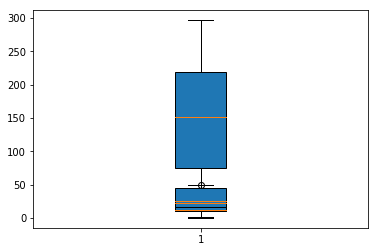

In [12]:
# Task 2

plt.boxplot(df_marketing['TV'],patch_artist=True)
plt.boxplot(df_marketing['radio'],patch_artist=True)
plt.boxplot(df_marketing['newspaper'],patch_artist=True)
plt.boxplot(df_marketing['sales'],patch_artist=True)


# from the above boxplot we conclude that the average spending amount on TV  ranges in 150(thousands)

# newpaper ,radio in (20-40)
# sales in (10-20)(in lakhs)

Text(0.5, 1.0, 'lineplot of df_marketing')

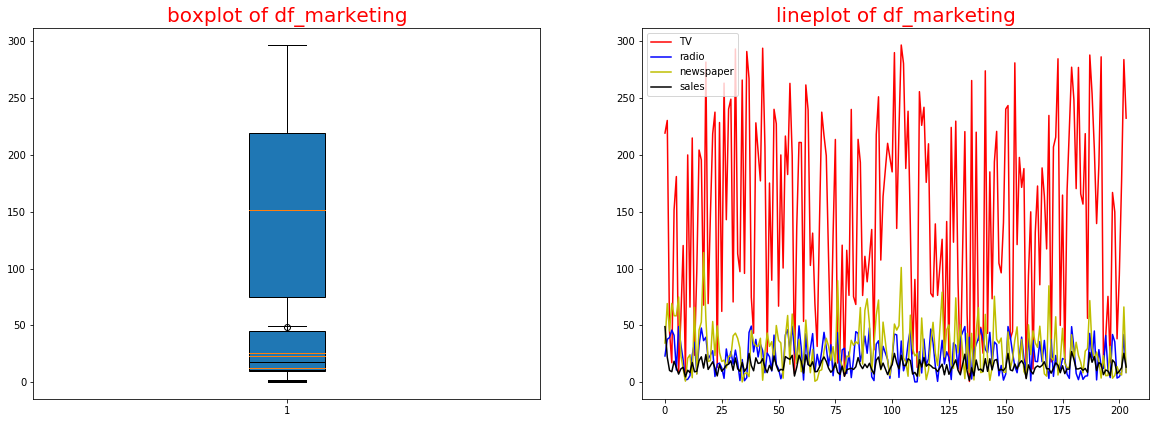

In [13]:
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(221)

ax1.boxplot(df_marketing['TV'],patch_artist=True)
ax1.boxplot(df_marketing['radio'],patch_artist=True)
ax1.boxplot(df_marketing['newspaper'],patch_artist=True)
ax1.boxplot(df_marketing['sales'],patch_artist=True)
ax1.set_title('boxplot of df_marketing', fontsize=20,color='r')
ax2=fig.add_subplot(222)

ax2.plot(df_marketing['TV'],color='r')
ax2.plot(df_marketing['radio'],color='b')
ax2.plot(df_marketing['newspaper'],color='y')
ax2.plot(df_marketing['sales'],color='black')
ax2.legend(loc='best')
ax2.set_title('lineplot of df_marketing', fontsize=20,color='r')

# from the above lineplot it shows that  spending on TV widely ranges compared to radio and newspaper

# Task 3:


# dependent and independent varibles in the given  data set are  :sales(dep)  TV(indep),newpaper(indep),radio(indep)
# as the sales data is dependent on expenditure spent on TV,newpaper,radio
# where as tv,radio,newpaper independet variables i.e independent on other varibles

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


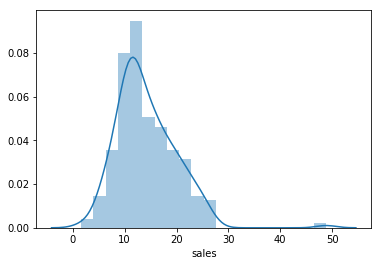

In [14]:
sns.distplot(df_marketing.sales,kde=True)

Text(0, 0.5, 'sales')

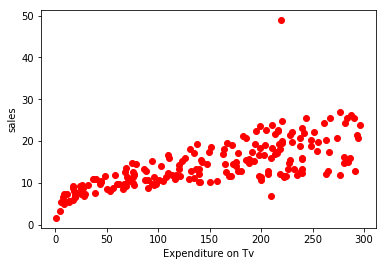

In [15]:
# Task  4:

plt.scatter(df_marketing['TV'],df_marketing['sales'],color='r')
plt.xlabel('Expenditure on Tv')
plt.ylabel('sales')

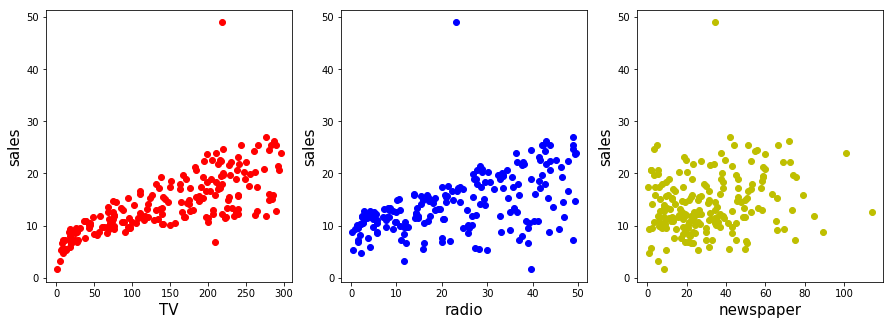

In [16]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
ax1.set_xlabel('TV',fontsize=15)
ax1.set_ylabel('sales',fontsize=15)
ax1.scatter(df_marketing['TV'],df_marketing['sales'],color='r')
ax2.set_xlabel('radio',fontsize=15)
ax2.set_ylabel('sales',fontsize=15)
ax2.scatter(df_marketing['radio'],df_marketing['sales'],color='b')
ax3.set_xlabel('newspaper',fontsize=15)
ax3.set_ylabel('sales',fontsize=15)
ax3.scatter(df_marketing['newspaper'],df_marketing['sales'],color='y')

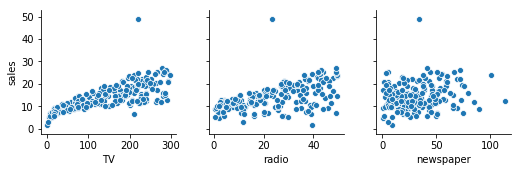

In [17]:
sns.pairplot(df_marketing,
              x_vars=['TV','radio','newspaper'],
               y_vars=['sales'],
               kind='scatter',
            palette='Dark2')

In [18]:
# Task 5

df_marketing['TotalAdvt']=df_marketing['TV']+df_marketing['radio']+df_marketing['newspaper']

In [19]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales,TotalAdvt
0,1,219.0,23.122167,34.5,48.9,276.622167
1,2,230.1,37.800000,69.2,22.1,337.100000
2,3,44.5,39.300000,45.1,10.4,128.900000
3,4,17.2,45.900000,69.3,9.3,132.400000
4,5,151.5,41.300000,58.5,18.5,251.300000


In [20]:
sales_returns=np.array(df_marketing['sales'][:-1],np.float)/np.array(df_marketing['sales'][1:],np.float)-1
TotalAdvt_returns=np.array(df_marketing['TotalAdvt'][:-1],np.float)/np.array(df_marketing['TotalAdvt'][1:],np.float)-1

In [21]:
df_marketing['sales_returns']=np.append(sales_returns,np.nan)
df_marketing['TotalAdvt_returns']=np.append(TotalAdvt_returns,np.nan)

In [22]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales,TotalAdvt,sales_returns,TotalAdvt_returns
0,1,219.0,23.122167,34.5,48.9,276.622167,1.212670,-0.179406
1,2,230.1,37.800000,69.2,22.1,337.100000,1.125000,1.615206
2,3,44.5,39.300000,45.1,10.4,128.900000,0.118280,-0.026435
3,4,17.2,45.900000,69.3,9.3,132.400000,-0.497297,-0.473140
4,5,151.5,41.300000,58.5,18.5,251.300000,0.434109,0.005200


In [23]:
simple_model=linear_model.LinearRegression()

In [24]:
k=df_marketing['sales_returns'].isnull() | df_marketing['TotalAdvt_returns'].isnull()
df_marketing=df_marketing[~k]

In [25]:
X=df_marketing['TotalAdvt_returns'][:-1].values.reshape(-1,1)
Y=df_marketing['sales_returns'][:-1]

In [26]:
simple_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
simple_model.score(X,Y)

0.495268377820519

# R^2 value

In [28]:
simple_model.coef_

array([0.35268612])

In [29]:
simple_model.intercept_

0.03694446214858227

# b value(intercept)

# simple linear regression expression is y=mx+c


# i.e y=(0.35268612)x+(0.03694446214858227)

In [30]:
y=(0.35268612)*(50)+(0.03694446214858227)
y

17.67125046214858

# sales on spending 50k on advertising

In [31]:
y=simple_model.predict([[50]])
y

array([17.67125024])

# as the predicted and caalculated values resembles

In [32]:
# Task 6:

tv_returns=np.array(df_marketing['TV'][:-1],np.float)/np.array(df_marketing['TV'][1:],np.float)-1
radio_returns=np.array(df_marketing['radio'][:-1],np.float)/np.array(df_marketing['radio'][1:],np.float)-1
newspaper_returns=np.array(df_marketing['newspaper'][:-1],np.float)/np.array(df_marketing['newspaper'][1:],np.float)-1



In [33]:
df_marketing['tv_returns']=np.append(tv_returns,np.nan)
df_marketing['radio_returns']=np.append(radio_returns,np.nan)
df_marketing['newspaper_returns']=np.append(newspaper_returns,np.nan)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [34]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales,TotalAdvt,sales_returns,TotalAdvt_returns,tv_returns,radio_returns,newspaper_returns
0,1,219.0,23.122167,34.5,48.9,276.622167,1.212670,-0.179406,-0.048240,-0.388302,-0.501445
1,2,230.1,37.800000,69.2,22.1,337.100000,1.125000,1.615206,4.170787,-0.038168,0.534368
2,3,44.5,39.300000,45.1,10.4,128.900000,0.118280,-0.026435,1.587209,-0.143791,-0.349206
3,4,17.2,45.900000,69.3,9.3,132.400000,-0.497297,-0.473140,-0.886469,0.111380,0.184615
4,5,151.5,41.300000,58.5,18.5,251.300000,0.434109,0.005200,-0.162058,2.824074,0.001712


In [35]:
x1=df_marketing['tv_returns'][:-1]
x2=df_marketing['radio_returns'][:-1]
x3=df_marketing['newspaper_returns'][:-1]

In [36]:
X1=np.vstack((x1,x2,x3))

In [37]:
Y1=df_marketing['sales_returns'][:-1]

In [38]:
X1=X1.T

In [39]:
multi_model=linear_model.LinearRegression()

In [40]:
multi_model.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
multi_model.score(X1,Y1)

0.6272415548773913

#  R^2 value

In [42]:
multi_model.intercept_

-0.002921281507590384

In [43]:
multi_model.coef_

array([ 0.07504482,  0.02770128, -0.00303357])

# mathematical expression can be interpreted as 
# y=mx+b
# y=m1x1+m2x1+m3x3+b
# (m1,m2,m3) represents slopes

In [44]:
y=(-0.002921281507590384)+(90*0.07504482)+(3*0.02770128)+(45*(-0.00303357))
y

6.69770570849241

In [45]:
y1=(-0.002921281507590384)+(290*0.07504482)+(3*0.02770128)+(80*(-0.00303357))
y1

21.60049475849241

In [46]:
multi_model.predict(np.array([[90,3,45]]))

array([6.69770514])

# it resembles the calculated value

In [47]:
multi_model.predict(np.array([[290,0,80]]))

array([21.51738933])

# it's almost resembles the calculated value

In [48]:
# Task 7:

simple_y=simple_model.predict(X)
multi_y=multi_model.predict(X1)

# here incase of multi model used the given ex.
# in general we can substitute the slopes of  x  parameter

In [49]:

linearmodel_y=Y
linearmodel_predy=simple_y
mean_squared_error(linearmodel_y,linearmodel_predy,multioutput='raw_values')

array([0.2902042])

In [51]:
multimodel_y=Y1
multimodel_predy=multi_y
mean_squared_error(multimodel_y,multimodel_predy,multioutput='raw_values')

array([0.21432393])

# considering the given ex. in question 

# here we got mean squared error of multi model is compaerble less value than simple model 
# hence


# we conclude that multi model has less scope of error than linearmodel